# Práctica 4

## Modelo SIR

[link text](https:// [link text](https://))El modelo SIR es un modelo epidemiológico relativamente simple pero capaz de capturar varias de las dinámicas de diferentes brotes epidémicos. La idea del modelo consiste en separar la población en cada tiempo $n$ en tres compartimentos:

- los susceptibles ($S_n$)
- los infectados ($I_n$)
- los removidos ($R_n$)

La población se considera de tamaño fijo, N, por lo que se debe cumplir que $S_n +I_n +R_n =N$ en todo tiempo $n$.

**Observaciones:**

-  La población que se considerará en este modelo es constante y su tamaño es igual a $N$.
- No se tomarán en cuenta las inmigraciones y emigraciones de la población, es decir, la población será considerada cerrada.
- La población esta homogéneamente mezclada. El proceso de transmisión de la enfermedad está regido por la ley de acción de masas.
- Los individuos infecciosos abandonarán su clase a una tasa constante $γ$ para pertenecer a la clase de removidos.

Teniendo esto en cuenta, se puede plantear un sistema de ecuaciones en diferencias que describe el comportamiento de cada una de estas poblaciones de la siguiente manera:

Veamos como definir el cambio en cada una de ellas. Para ello consideraremos dos parámetros:

- $α$: la tasa de contacto efectivo de la enfermedad.
- $γ$: la tasa de recuperación promedio.

De esta forma tenemos que un individuo infectado en promedio infecta $α$ individuos por unidad de tiempo. De las $N$ personas la fracción de susceptibles al tiempo n es $S_n/N$ por lo que en promedio se infectan $ \alpha \frac{S_n}{N}$. Por otro lado, al tiempo $n$ hay $I_n$ infectados entonces en promedio, al tiempo $n$, tenemos $αS_n I_n$ Nnuevos infectados. Finalmente, tenemos que la proporción de los infectados que se recuperan (o mueren) es $γI_n$. De esta forma tenemos que:

- $ΔS_n = −α \frac{S_n I_n}{N} \quad\qquad \,\,\,$ donde $ \quad \Delta S_n=S_{n+1}-S_{n}$.
- $ΔI_n = α \frac{S_n I_n}{N} −γI_n \quad\quad$ donde $\quad ΔI_n =I_{n+1} −I_n$
- $ΔR_n = γI_n\qquad\quad\quad\quad$donde $\quad ΔR_n =R_{n+1} −R_n$.

Y así nuestro modelo queda de la siguiente manera

- $S_{n+1} = S_{n} - \frac{ \alpha S_nI_n}{N} $.

- $I_{n+1} = I_{n} + \frac{ \alpha S_nI_n}{N} - \gamma I_{n} \quad (2)$

- $I_{n+1} = I_{n} + \gamma I_n$.

De esta forma podemos definir la siguiente cantidad:

\begin{equation}
 \mathcal{R}_0 \equiv \frac{\alpha S_0}{\gamma N} \quad (3)
\end{equation}

Donde $S_0$ es la población inicial de susceptibles.

### Ejercicio 1:

Completa la siguiente función de forma que calcule la cantidad de susceptibles, infectados y removidos utilizando el sistema de ecuaciones en diferencias $(2.0)$.
``` python
import numpy as np
import matplotlib.pyplot as plt

def SIR(S0, I0, R0, alfa, gamma, n, Plot = True):
    # Tú código va aquí
    if Plot:
        plt.plot(range(0,n,1), S, 'm', label = 'S(n)')
        plt.plot(range(0,n,1), I, 'b', label = 'I(n)')
        plt.plot(range(0,n,1), R, 'g', label = 'R(n)')
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('Población')
        plt.title('Modelo SIR')
        plt.show()
        return
    else :
        return (S, I, R)
```

Observa que los parámetros de la función son: las condiciones iniciales del modelo (```S0```,```I0``` y ```R0```), la tasa de contacto efectivo (```alfa```), la tasa de recuperación (```gamma```) y el número de iteraciones (```n```). El parámetro ```Plot = True``` solo se encarga de mostrar la gráfica del sistema. Al final la función debe regresar una tupla que contenga las listas con el el número de susceptibles, infectados y recuperados en cada tiempo.

Prueba tu función con los siguientes parámetros:
- ```S0``` = 1000000
- ```I0``` = 127
- ```R0``` = 0
- ```alfa``` = 1
- ```gamma``` = 0.6
- ```n``` = 150

#### Función

In [60]:
import numpy as np
import matplotlib.pyplot as plt #Importo las librerias que usare

def SIR(S0, I0, R0, alfa, gamma, n, Plot = True): #La función te pide 6 valores, los 3 valores iniciales de Susceptibles, infectados y removidos, ademas de los 2 parametros y el numero de iteraciones
    S=[S0]
    I=[I0]
    R=[R0]
    T=[0] #Realizo mis 4 listas para agregar los valores de mis 3 poblaciones y el contador de tiempo respectivamente
    N=S0+I0+R0 #Mi población total
    j=0 #Mi contador de tiempo
    while j<n:
      Sn1=S[j]-(alfa*S[j]*I[j]/N)
      In1=I[j]+(alfa*S[j]*I[j]/N)-(I[j]*gamma)
      Rn1=R[j]+(gamma*I[j])
      #Realizo las 3 funciónes en diferenciales y de manera recursiva
      j=j+1 #Sumo a mi contador
      T.append(j)
      S.append(Sn1)
      I.append(In1)
      R.append(Rn1)
      #A cada lista agrego el valor respectivo de la población en esa unidad de tiempo
    if Plot:
        plt.plot(T, S, 'm', label='S(n)')
        plt.plot(T, I, 'b', label='I(n)')
        plt.plot(T, R, 'g', label='R(n)')
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('Población')
        plt.title('Modelo SIR')
        plt.show()
        #Por ultimo grafico en función de T el comportamiento de mis 3 poblaciones
    else:
        return S, I, R

#### Gráficas

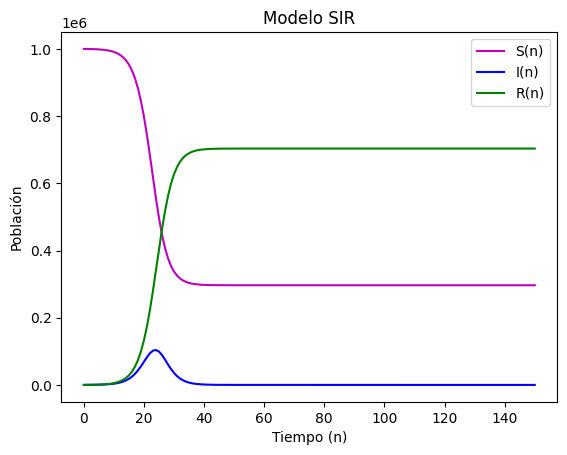

In [61]:
SIR( 1000000, 127, 0, 1, 0.6, 150) #Grafica a)

### Ejercicio 2:

Utiliza la función que programaste en el ejercicio 2 para determinar el desarrollo de las epidemias con los siguientes parámetros:

|**Caso 1**|**Caso 2**|**Caso 3**|  
|:-----------------|:-----------------|:------------------|
| ```S0``` = 100000|```S0``` = 200000 |```S0``` = 1000000 |
| ```I0``` = 200000|```I0``` = 100000 |```I0``` = 10      |
| ```R0``` = 0     |```R0``` = 0      |```R0``` = 0       |
| ```alfa``` = 0.7 | ```alfa``` = 0.75|```alfa```= 0.75   |
| ```gamma``` = 0.5 | ```gamma``` = 0.5 |```gamma``` = 0.5   |
| ```n``` = 150    | ```n``` = 150    |```n``` = 100      |




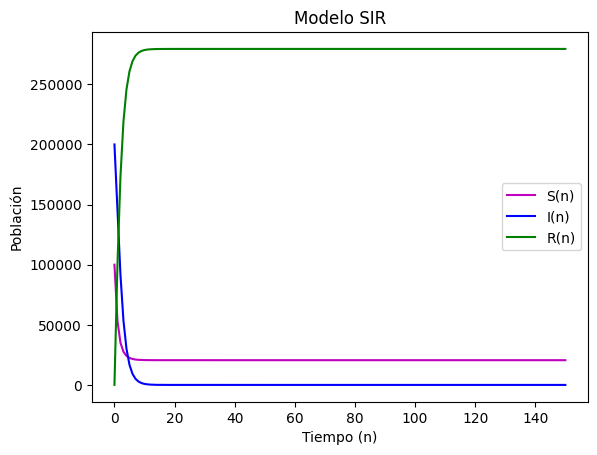

In [5]:
SIR( 100000, 200000, 0, 0.7, 0.5, 150) #Grafica b)

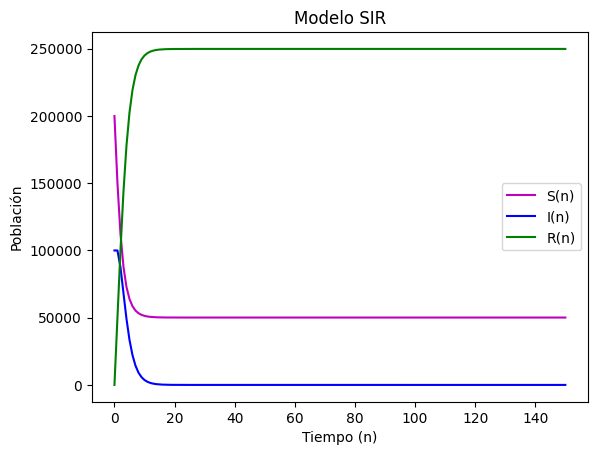

In [6]:
SIR( 200000, 100000, 0, 0.75, 0.5, 150) #Grafica c)

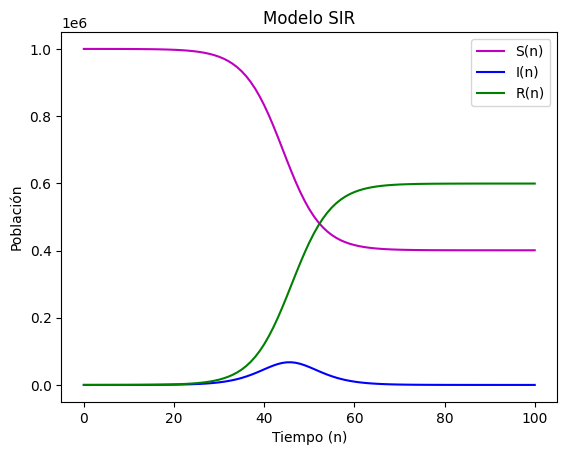

In [7]:
SIR( 1000000, 10, 0, 0.75, 0.5, 100) #Grafica d)

### Ejercicio 3:

Para los casos del Ejercicio 2 calcula $R_0$ utilizando la definición $(3.0)$ y argumenta como se relaciona este valor con el desarrollo de la epidemia.

\begin{equation}
 \mathcal{R}_0 \equiv \frac{\alpha S_0}{\gamma N} \quad (3)
\end{equation}

Hint: Observa la pendiente de la curva de los infectados en las gráficas anteriores ¿Qué te dice eso sobre los brotes epidémicos? (fijate en el cambio en el número de infectados).

\begin{equation} I_{n+1} - I_{n} = \frac{\alpha S_nI_n}{N} - \gamma I_n
\end{equation}


#### Función

In [27]:
def Din(S0, I0, R0, alfa, gamma, n, Plot = True):#Me basare en mi función, pero solo graficare el valor de ΔIn en función del tiempo
    S=[S0]
    I=[I0]
    R=[R0]
    D=[0]
    T=[0] #Las listas se mantienen igual pues ΔIn depende de algunos de estos valores
    N=S0+I0+R0 #Mi población total
    j=0 #Mi contador de tiempo
    while j<n:
      Sn1=S[j]-(alfa*S[j]*I[j]/N)
      In1=I[j]+(alfa*S[j]*I[j]/N)-(I[j]*gamma)
      Rn1=R[j]+(gamma*I[j])
      Din=(alfa*S[j]*I[j]/N)-(I[j]*gamma)
      #Realizo las 3 funciónes en diferenciales y de manera recursiva
      j=j+1 #Sumo a mi contador
      D.append(Din)
      T.append(j)
      S.append(Sn1)
      I.append(In1)
      R.append(Rn1)
      #A cada lista agrego el valor respectivo de la población en esa unidad de tiempo
    if Plot:
        plt.plot(T, D, 'r', label='ΔIn')
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('Población')
        plt.title('Modelo SIR')
        plt.show()
        #Por ultimo grafico en función de T el comportamiento de mis 3 poblaciones
    else:
        return S, I, R

In [42]:
def Ro(S0, I0, R0, alfa, gamma, n, Plot = True):#La función pido los mismos datos y calcula Ro con la formula dada
  Ro=(alfa*S0)/(gamma*(S0+I0+R0))
  print('El valor de Ro es de',Ro)

#### Gráficas

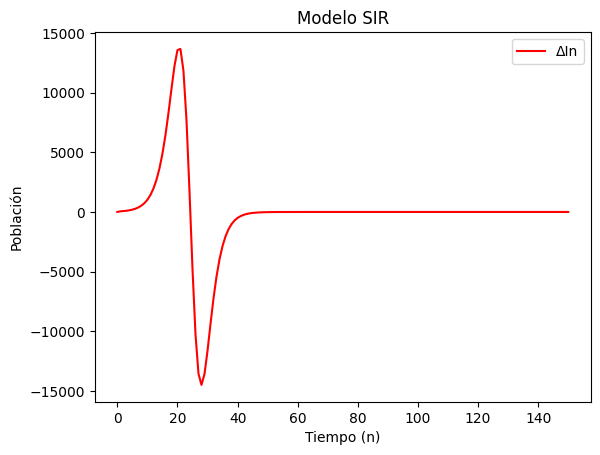

In [47]:
Din( 1000000, 127, 0, 1, 0.6, 150) #Grafica a)

In [44]:
Ro( 1000000, 127, 0, 1, 0.6, 150) #Grafica a)

El valor de Ro es de 1.6664550268782532


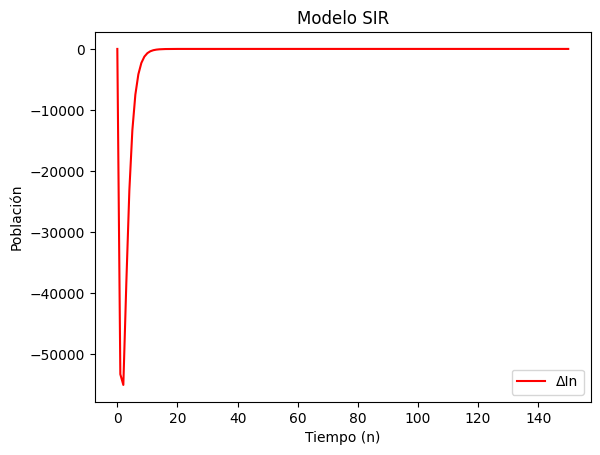

In [30]:
Din( 100000, 200000, 0, 0.7, 0.5, 150) #Grafica b)

In [48]:
Ro( 100000, 200000, 0, 0.7, 0.5, 150) #Grafica b)

El valor de Ro es de 0.4666666666666667


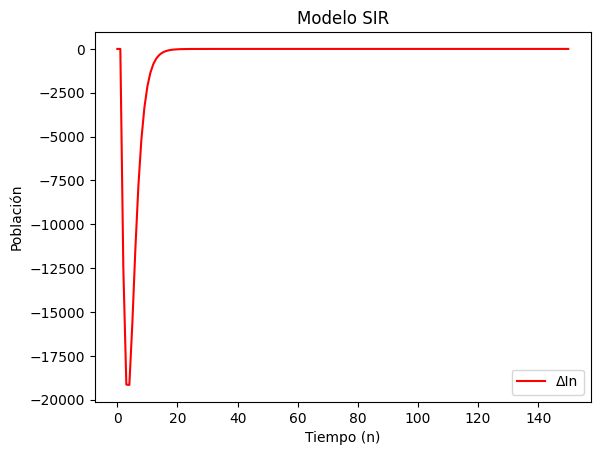

In [59]:
Din( 200000, 100000, 0, 0.75, 0.5, 150) #Grafica c)

In [57]:
Ro( 200000, 100000, 0, 0.75, 0.5, 150) #Grafica c)

El valor de Ro es de 1.0


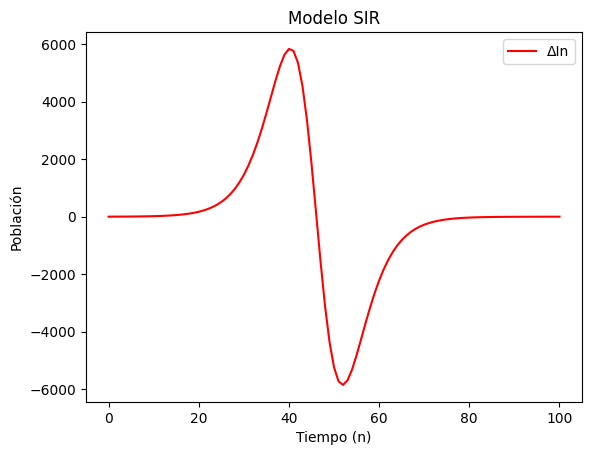

In [32]:
Din( 1000000, 10, 0, 0.75, 0.5, 100) #Grafica d)

In [50]:
Ro( 1000000, 10, 0, 0.75, 0.5, 100) #Grafica d)

El valor de Ro es de 1.4999850001499986


De la formula ${R}_0 \equiv \frac{\alpha S_0}{\gamma N}$   podriamos decir que es igual a la proporción entre la taza de contacto efectivo respecto a la taza de recuperación($\frac{\alpha}{\gamma}$) por la proporción de susceptibles en un inicio $\frac{S_0}{N}$, podria afirmar que $\frac{\alpha}{\gamma}$ es la cantidad en promedio de personas que un infectado afecta antes de volverse removido (pues $\alpha$ es la taza de contacto efectivo y $\frac{1}{\gamma}$ la cantidad de intervalos de tiempo necesarios para que el infectado se vuelva removido), entonces ahora puedo afirmar 3 casos:

- Si ${R}_0=\frac{S_0}{N} \Longrightarrow\frac{\alpha}{\gamma}=1 $ Por lo tanto en promedio la cantidad de infectados se terminara acercando bastante al valor inicial y no hay riesgo de pandemia pero no estaria mal buscar una forma de reducir la propagación si es que los infectados iniciales son demasiados

- Si ${R}_0<\frac{S_0}{N}\Longrightarrow\frac{\alpha}{\gamma}<1$  Podria afirmarque a la larga probablemente la cantidad de infectados decrezca y no habria necesidad de tomar acción

- Si ${R}_0>\frac{S_0}{N}\Longrightarrow\frac{\alpha}{\gamma}>1$ En este caso es muy probable que la cantidad de infectados crezca (dependiendo de que tan grande sea crece más o menos lento), y dependiendo que tanto crezca hay riesgo de incluso una pandemia, por lo que habria que tomar cartas en el asunto

En conclusión podria decir que $R_{0}$ te puede ayudar a predecir de una manera muy general como se podria comportar la infección, o incluso teniendo ya datos, podrias calcular (no se que tan preciso) la proporcion $\frac{\alpha}{\gamma}$

## Divide y vencerás.

### Ejercico 1
En la famosa *Batalla de Trafalgar* en $1805$, la Armada Naval Británica dirigida por el Almirante Nelson se enfrentó contra la Armada Franco-Española bajo el mando de Napoleón. Inicialmente, los británicos contaban con $27$ barcos, mientras que los franceses contaban con $18$ y los españoles con $15$. Supongamos ahoa que, en cada encuentro, cada lado sufre una pérdida general igual al $10 \%$ del número de barcos del enemigo (los valores decimales pueden pensarse como barcos que no están a su capacidad completa).
- Formule un sistema de ecuaciones en diferencia para modelar el número de barcos $(B_n,F_n)n∈N$ de cada flota después de cada encuentro, empezando de $(B_0,F_0) = (27,33)$.
- Formule una solución numérica para determinar cuantos enfrentamientos durará la batalla, si consideramos que ésta termina cuando alguno de los dos bandos tiene menos de un barco. ¿Qué bando resulta ganador?

- $ΔB_{n+1} =B_{n}+ΔB_{n}\quad$ donde  $\quadΔB_{n}=-\frac{F_{n}}{10}$

- $ΔF_{n+1} =F_{n}+ΔF_{n}\quad$ donde  $\quadΔF_{n}=-\frac{B_{n}}{10}$


#### Función

In [ ]:
#Me basare en la función usada en el ejercicio anterior
def batalla(B0, F0, Plot = True,j=0): #La función te pide los 2 valores iniciales de los barcos de cada ejercito
    B=[B0]
    F=[F0]
    T=[0] #Realizo mis 3 listas para agregar los valores de mi numero de barcos y el contador de tiempo respectivamente
    while B0>1 and F0>1: #El while se detendra cuando alguno de los dos valores sea menor que 1
      B01=B0 #Fijo el valor de B0 para usarlo antes de aplicar el cambio
      B0=B0-(F0/10)
      F0=F0-(B01/10) #Uso el valor fijado para aplicar el cambio
      j=j+1 #Sumo a mi contador
      T.append(j)
      B.append(B0)
      F.append(F0)
      #A cada lista agrego el valor respectivo de la población en esa unidad de tiempo
    if B0<0: #Si el valor en la ultima iteración toma valores negativos(por que la resta supera a los barcos restantes), le asigno el valor 0
      B0=0
    if F0<0:
      F0=0
    if B0<1:
      print('Los britanicos perdieron la batalla en', j, 'encuentros con', B0, 'Barcos restantes y ganaron los franceses/españoles con', F0, 'Barcos restantes')
    if F0<1:
      print('Los franceses/españoles perdieron la batalla en', j, 'encuentros con', F0, 'Barcos restantes y ganaron los britanicos con', B0, 'Barcos restantes')
    #Imprimo esto para contabilizar las bajas y barcos restantes y poder usarlos como dato
    if Plot:
        plt.plot(T, B, 'b', label='Britanicos')
        plt.plot(T, F, 'y', label='Franco/Españoles')
        plt.grid()
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('N de barcos')
        plt.title('Divide y venceras')
        plt.show()
        #Por ultimo grafico en función de T el comportamiento de mis 2 poblaciones
    else:
        return S, I, R

#### Gráficas

Los britanicos perdieron la batalla en 11 encuentros con 0.854967764370002 Barcos restantes y ganaron los franceses/españoles con 17.97366800103 Barcos restantes


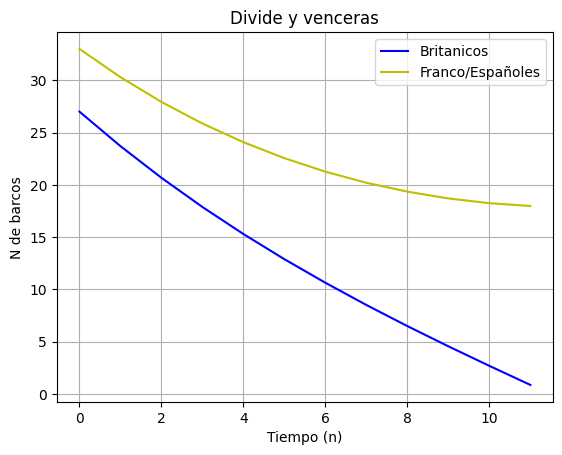

In [ ]:
batalla(27, 33)

Podemos observar que la ventaja númerica que tienen los britanicos y bajo nuestras suposiciones de bajas, estos ganarian la batalla y con una gran ventaja, ya que aun les quedarian 17.97 barcos, por lo que la estrategia del Almirante Nelson juega un papel de suma importancia en la batalla.

En la realidad, la estrategia del Almirante Nelson fue decisiva para la batalla. La armada franco-española estaba organizada en una línea, formada por tres grupos separados: $A = 3, B = 17$ y $C = 13$. El Almirante Nelson decidió entonces atacar la fuerza $A$ con $13$ barcos británicos, y luego utilizar los barcos sobrevivientes y los $14$ restantes que estaban en reserva para atacar la fuerza $B$, y finalmente usar todos los sobrevivientes para atacar la fuerza $C$.

- Suponiendo que el modelo planteado en el ejercicio 1 sigue siendo válido, construya una solución numérica que tenga en cuenta la estrategia de Nelson y los enfrentamientos en sus tres etapas distintas. ¿La cantidad de encuentros es la misma que antes?¿El resultado de la batalla es similar?.

Tomare en cuenta que al ganar una batalla, los supervivientes restantes de la armada franco española no pueden ayudar a sus aliados.

Los franceses/españoles perdieron la batalla en 2 encuentros con 0.42999999999999994 Barcos restantes y ganaron los britanicos con 12.53 Barcos restantes


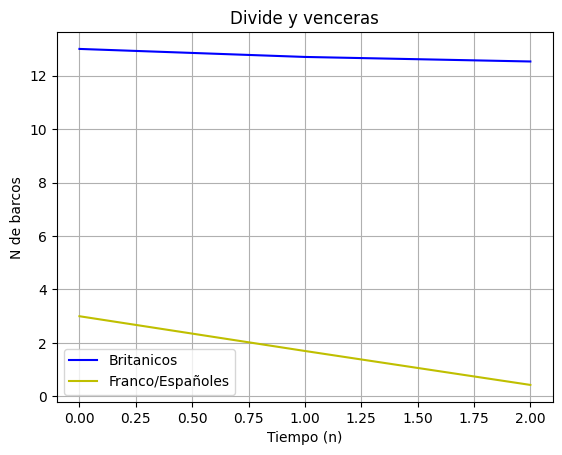

In [ ]:
batalla(13,3)

Los franceses/españoles perdieron la batalla en 8 encuentros con 0 Barcos restantes y ganaron los britanicos con 19.583319505300004 Barcos restantes


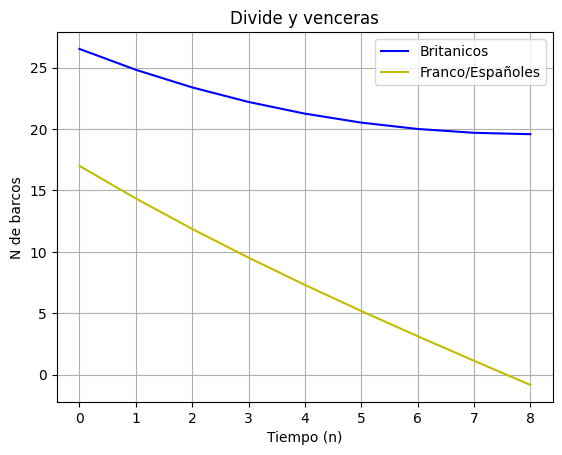

In [ ]:
batalla(12.53+14,17)

Los franceses/españoles perdieron la batalla en 8 encuentros con 0 Barcos restantes y ganaron los britanicos con 14.068990332100451 Barcos restantes


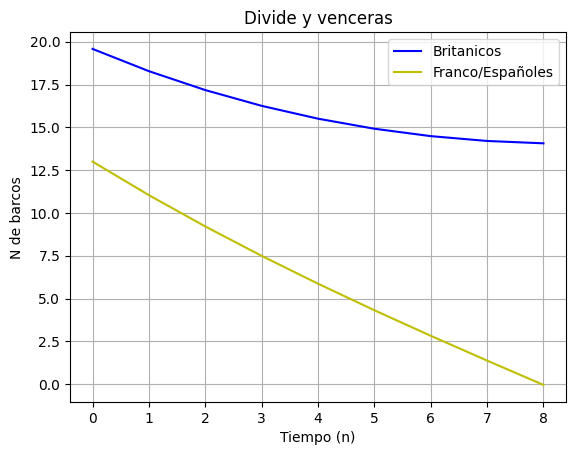

In [ ]:
batalla(19.583319505300004,13)

Podemos observar que el resultado y las batallas cambian demasiado, ya que en lugar de los 11 encuentros que supusimos originalmente, en este nuevo caso hay un total de 18 encuentros, de donde salio victorioso el ejercito britanico, y ademas se puede observar que la superioridad britanica fue tanta que al final unicamente perdieron aproximadamente 13 barcos, por lo que podriamos decir que la estrategia cambio completamente el resultado de la batalla.

### Ejercicio 2
Una estrategia alternativa para vencer a una fuerza superior es aumentar la tecnología empleada por el bando inferior. Suponga ahora que los barcos británicos estaban equipados con armamento superior, lo que produjo que, en cada encuentro, los franco-españoles pierdan una cantidad de barcos igual al $15 \%$ del bando enemigo, mientras que los británicos solo pierden una cantidad de barcos igual al $5 \%$
de la flota enemiga.

- Formule un sistema de ecuaciones en diferencia para modelar el número de barcos de cada flota durante la batalla. Suponga que la armada franco-española empieza con $33$ barcos y los británicos con $27$.
- Con esta nueva suposición, construya una solución numérica para determinar quien gana si ambas fuerzas se enfrentan directamente.
- Construya una solución numérica para las tres batallas empleando la estrategia de Nelson aco-plada con el armamento superior de la armada británica.

- $ΔB_{n+1} =B_{n}+ΔB_{n}\quad$ donde  $\quadΔB_{n}=-0.05 F_{n}=-\frac{F_{n}}{20}$

- $ΔF_{n+1} =F_{n}+ΔF_{n}\quad$ donde  $\quadΔF_{n}=-0.15 B_{n}=-\frac{3B_{n}}{20}$

#### Función

In [ ]:
#La funcion sera casi igual que la anterior con excepcion de las diferencias en función del tiempo las cuales cambian
def batalla2(B0, F0, Plot = True,j=0):
    B=[B0]
    F=[F0]
    T=[0] #Realizo mis 3 listas para agregar los valores de mi numero de barcos y el contador de tiempo respectivamente
    while B0>1 and F0>1: #El while se detendra cuando alguno de los dos valores sea menor que 1
      B01=B0 #Fijo el valor de B0 para usarlo antes de aplicar el cambio
      B0=B0-(F0/20)
      F0=F0-(3*B01/20) #La función es casi igual solo en esta parte cambio los valores de los diferenciales
      j=j+1 #Sumo a mi contador
      T.append(j)
      B.append(B0)
      F.append(F0)
      #A cada lista agrego el valor respectivo de la población en esa unidad de tiempo
    if B0<0: #Si el valor en la ultima iteración toma valores negativos(por que la resta supera a los barcos restantes), le asigno el valor 0
      B0=0
    if F0<0:
      F0=0
    if B0<1:
      print('Los britanicos perdieron la batalla en', j, 'encuentros con', B0, 'Barcos restantes y ganaron los franceses/españoles con', F0, 'Barcos restantes')
    if F0<1:
      print('Los franceses/españoles perdieron la batalla en', j, 'encuentros con', F0, 'Barcos restantes y ganaron los britanicos con', B0, 'Barcos restantes')
    #Imprimo esto para contabilizar las bajas y barcos restantes y poder usarlos como dato
    if Plot:
        plt.plot(T, B, 'b', label='Britanicos')
        plt.plot(T, F, 'y', label='Franco/Españoles')
        plt.grid()
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('N de barcos')
        plt.title('Divide y venceras')
        plt.show()
        #Por ultimo grafico en función de T el comportamiento de mis 2 poblaciones
    else:
        return S, I, R

#### Gráficas

Los franceses/españoles perdieron la batalla en 10 encuentros con 0.3276268837713885 Barcos restantes y ganaron los britanicos con 18.425361042769627 Barcos restantes


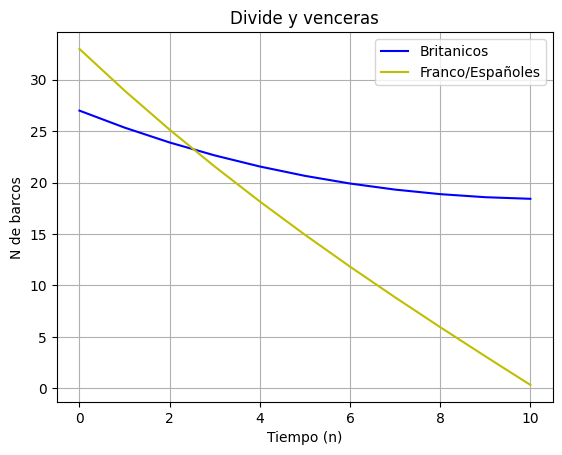

In [ ]:
batalla2(27, 33)

Se puede observar que al contrario que en la suposición anterior, en este caso los britanicos resultan vencedores, superando la ventaja númerica de Francia/España

Los franceses/españoles perdieron la batalla en 2 encuentros con 0 Barcos restantes y ganaron los britanicos con 12.7975 Barcos restantes


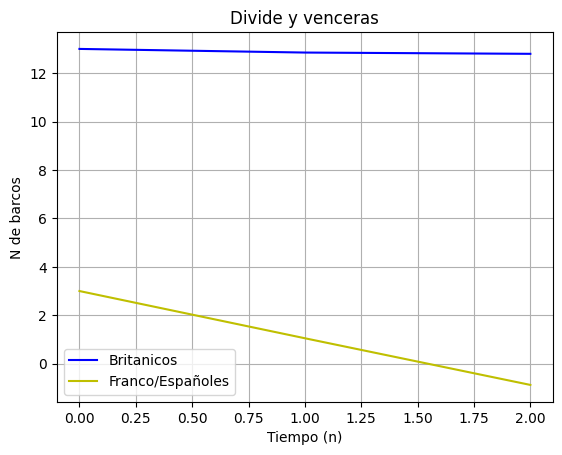

In [ ]:
batalla2(13,3)

Los franceses/españoles perdieron la batalla en 5 encuentros con 0 Barcos restantes y ganaron los britanicos con 24.501051484374997 Barcos restantes


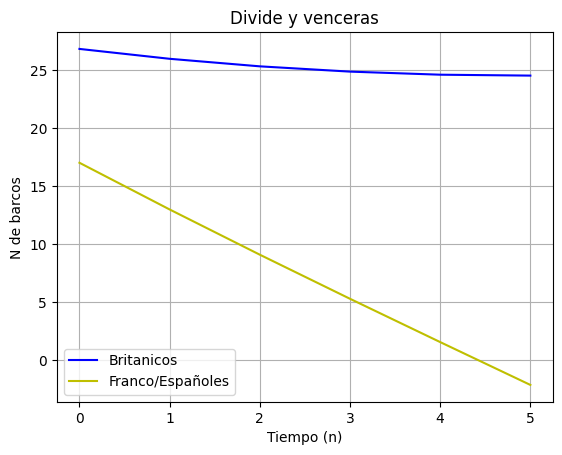

In [ ]:
batalla2(14+12.7975,17)

Los franceses/españoles perdieron la batalla en 4 encuentros con 0 Barcos restantes y ganaron los britanicos con 22.98547698531787 Barcos restantes


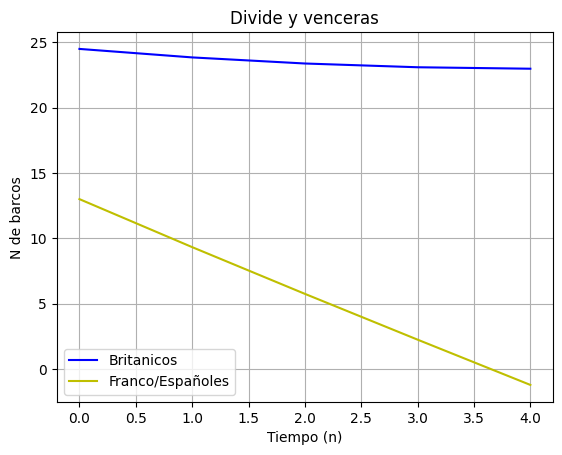

In [ ]:
batalla2(24.501051484374997,13)

Se puede observar que con estas nuevas suposiciones, la superioridad britanica se nota demasiado, perdiendo aproximadamente 8.5 barcos si omitimos la estrategia de el Almirante Nelson, y aun se ve más la ventaja si tomamos esta estrategia en cuenta, perdiendo aproximadamente solo 4 barcos